In [88]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD , Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from sklearn.cluster import KMeans
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import dask.dataframe as dd

In [89]:
#pip install mlxtend  

In [90]:
#df = pd.read_csv("F:/1.SecondSemester/Manufacturing/ManuData/Divide Excel File/ManuDataTest.csv")
df = pd.read_csv("F:/1.SecondSemester/Manufacturing/ManuData/NewData_7feb23/인제대 요청_prev_realtime_new/Test/prev_realtime.csv")

In [91]:
nRow, nCol = df.shape # Shape gives the dimensions of data in thr form of rows and columns
print(nRow)
print(nCol)

368615
23


# Data Load ::

In [92]:
df.head() #Visualized the dataset

,insert_datetime,fanuc_runState_now,fanuc_runState_past,fanuc_cycle_hour,fanuc_cycle_min,fanuc_cycle_sec,fanuc_rpm1,fanuc_rpm1_unit,fanuc_troq1,fanuc_troq1_unit,...,fanuc_absoluteY,fanuc_absoluteZ,fanuc_distanceX,fanuc_distanceY,fanuc_distanceZ,ep1_activeTotal,ep2_activeTotal,ep3_activeTotal,ep4_activeTotal,ep5_activeTotal
0,2022-12-02 14:04:02,START,START,0,48,31,0,1,0,0,...,405.85,606.150,0.0,0.0,0.000,5.354,0.004,0.079,0.007,0.009
1,2022-12-02 14:04:03,START,START,0,48,32,0,1,0,0,...,405.85,606.150,0.0,0.0,0.000,5.354,0.004,0.079,0.007,0.009
2,2022-12-02 14:04:04,START,START,0,48,33,0,1,0,0,...,405.85,606.150,0.0,0.0,0.000,5.392,0.004,0.059,0.007,0.009
3,2022-12-02 14:04:05,START,START,0,48,34,0,1,0,0,...,405.85,606.150,0.0,0.0,0.000,5.392,0.004,0.059,0.007,0.009
4,2022-12-02 14:04:20,START,START,0,48,49,3824,1,22,0,...,41.00,-18.933,0.0,0.0,-9.067,11.603,0.004,0.349,0.002,0.084


In [93]:
df.columns

Index(['insert_datetime', 'fanuc_runState_now', 'fanuc_runState_past',
       'fanuc_cycle_hour', 'fanuc_cycle_min', 'fanuc_cycle_sec', 'fanuc_rpm1',
       'fanuc_rpm1_unit', 'fanuc_troq1', 'fanuc_troq1_unit',
       'fanuc_gearRatio1', 'fanuc_ToolNum', 'fanuc_absoluteX',
       'fanuc_absoluteY', 'fanuc_absoluteZ', 'fanuc_distanceX',
       'fanuc_distanceY', 'fanuc_distanceZ', 'ep1_activeTotal',
       'ep2_activeTotal', 'ep3_activeTotal', 'ep4_activeTotal',
       'ep5_activeTotal'],
      dtype='object')

In [94]:
df.info() # This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368615 entries, 0 to 368614
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   insert_datetime      368615 non-null  object 
 1   fanuc_runState_now   368615 non-null  object 
 2   fanuc_runState_past  368615 non-null  object 
 3   fanuc_cycle_hour     368615 non-null  int64  
 4   fanuc_cycle_min      368615 non-null  int64  
 5   fanuc_cycle_sec      368615 non-null  int64  
 6   fanuc_rpm1           368615 non-null  int64  
 7   fanuc_rpm1_unit      368615 non-null  int64  
 8   fanuc_troq1          368615 non-null  int64  
 9   fanuc_troq1_unit     368615 non-null  int64  
 10  fanuc_gearRatio1     368615 non-null  int64  
 11  fanuc_ToolNum        368615 non-null  int64  
 12  fanuc_absoluteX      368615 non-null  float64
 13  fanuc_absoluteY      368615 non-null  float64
 14  fanuc_absoluteZ      368615 non-null  float64
 15  fanuc_distanceX  

In [95]:
df.describe() #The describe() method returns description of the data in the DataFrame.

,fanuc_cycle_hour,fanuc_cycle_min,fanuc_cycle_sec,fanuc_rpm1,fanuc_rpm1_unit,fanuc_troq1,fanuc_troq1_unit,fanuc_gearRatio1,fanuc_ToolNum,fanuc_absoluteX,fanuc_absoluteY,fanuc_absoluteZ,fanuc_distanceX,fanuc_distanceY,fanuc_distanceZ,ep1_activeTotal,ep2_activeTotal,ep3_activeTotal,ep4_activeTotal,ep5_activeTotal
count,368615.000000,368615.000000,368615.000000,368615.000000,368615.0,368615.000000,368615.0,368615.000000,3.686150e+05,368615.000000,368615.000000,368615.000000,368615.000000,368615.000000,368615.000000,368615.000000,368615.000000,368615.000000,368615.000000,368615.000000
mean,0.096873,24.547886,29.310766,2488.906005,1.0,7.226491,0.0,678.178132,3.902569e+07,32.641340,61.960245,78.893050,1.833317,-5.197008,-3.353361,7.393980,0.046069,0.351589,0.071890,0.413346
std,0.295786,17.227489,17.292312,1796.717860,0.0,14.249685,0.0,13.200678,1.613341e+07,141.516213,139.396541,226.866618,76.628250,56.406688,33.130409,2.526778,0.176557,0.727148,0.273801,1.196007
min,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.0,640.000000,1.000001e+07,-605.750000,-196.000000,-235.500000,-709.248000,-535.340000,-410.410000,0.001000,0.001000,0.001000,0.001000,0.001000
25%,0.000000,9.000000,14.000000,1329.000000,1.0,0.000000,0.0,672.000000,2.700001e+07,-35.000000,-10.005000,-20.888500,0.000000,0.000000,-3.085000,5.802000,0.004000,0.073000,0.003000,0.033000
50%,0.000000,23.000000,29.000000,2133.000000,1.0,3.000000,0.0,672.000000,4.000001e+07,0.000000,19.557000,0.000000,0.000000,0.000000,0.000000,6.714000,0.004000,0.126000,0.004000,0.099000
75%,0.000000,39.000000,44.000000,4603.000000,1.0,8.000000,0.0,680.000000,4.800001e+07,86.000000,102.000000,3.000000,0.000000,0.000000,0.000000,8.421000,0.012000,0.329000,0.006000,0.339000
max,1.000000,59.000000,59.000000,5758.000000,1.0,147.000000,0.0,744.000000,9.000001e+07,612.380000,535.340000,683.890000,709.300000,534.005000,480.193000,32.209000,3.919000,23.836000,4.542000,24.879000


# In Data Analysis What All Things We Do
* Missing Values
* Explore About the Numerical Variables
* Explore About categorical Variables
* Finding Relationship between features

In [96]:
df.shape

(368615, 23)

In [97]:
df.isnull().sum()

insert_datetime        0
fanuc_runState_now     0
fanuc_runState_past    0
fanuc_cycle_hour       0
fanuc_cycle_min        0
fanuc_cycle_sec        0
fanuc_rpm1             0
fanuc_rpm1_unit        0
fanuc_troq1            0
fanuc_troq1_unit       0
fanuc_gearRatio1       0
fanuc_ToolNum          0
fanuc_absoluteX        0
fanuc_absoluteY        0
fanuc_absoluteZ        0
fanuc_distanceX        0
fanuc_distanceY        0
fanuc_distanceZ        0
ep1_activeTotal        0
ep2_activeTotal        0
ep3_activeTotal        0
ep4_activeTotal        0
ep5_activeTotal        0
dtype: int64

In [98]:
[features for features in df.columns if df[features].isnull().sum()>0]  # Specific things with respect to see the null Value

[]

<AxesSubplot:>

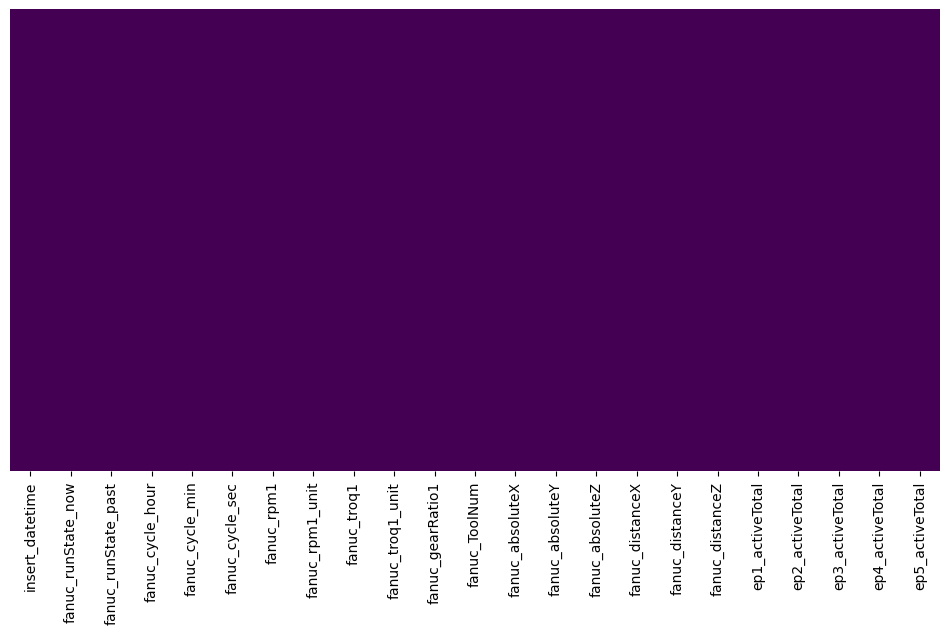

In [99]:

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') # Seaborn’s heatmap() to make a heatmap of the data to visualize the missing data in each variable
                                                                     # There has no none values

In [100]:
##Another way To check Data Types
df.dtypes

insert_datetime         object
fanuc_runState_now      object
fanuc_runState_past     object
fanuc_cycle_hour         int64
fanuc_cycle_min          int64
fanuc_cycle_sec          int64
fanuc_rpm1               int64
fanuc_rpm1_unit          int64
fanuc_troq1              int64
fanuc_troq1_unit         int64
fanuc_gearRatio1         int64
fanuc_ToolNum            int64
fanuc_absoluteX        float64
fanuc_absoluteY        float64
fanuc_absoluteZ        float64
fanuc_distanceX        float64
fanuc_distanceY        float64
fanuc_distanceZ        float64
ep1_activeTotal        float64
ep2_activeTotal        float64
ep3_activeTotal        float64
ep4_activeTotal        float64
ep5_activeTotal        float64
dtype: object

In [101]:
df.columns

Index(['insert_datetime', 'fanuc_runState_now', 'fanuc_runState_past',
       'fanuc_cycle_hour', 'fanuc_cycle_min', 'fanuc_cycle_sec', 'fanuc_rpm1',
       'fanuc_rpm1_unit', 'fanuc_troq1', 'fanuc_troq1_unit',
       'fanuc_gearRatio1', 'fanuc_ToolNum', 'fanuc_absoluteX',
       'fanuc_absoluteY', 'fanuc_absoluteZ', 'fanuc_distanceX',
       'fanuc_distanceY', 'fanuc_distanceZ', 'ep1_activeTotal',
       'ep2_activeTotal', 'ep3_activeTotal', 'ep4_activeTotal',
       'ep5_activeTotal'],
      dtype='object')

In [102]:
fanuc_time=df.groupby(['fanuc_cycle_hour','fanuc_cycle_min','fanuc_cycle_sec']).size().reset_index().rename(columns={0:'Fanuce Time Count'})
fanuc_time

,fanuc_cycle_hour,fanuc_cycle_min,fanuc_cycle_sec,Fanuce Time Count
0,0,0,0,73
1,0,0,1,98
2,0,0,2,102
3,0,0,3,111
4,0,0,4,109
...,...,...,...,...
4979,1,28,46,1
4980,1,28,47,1
4981,1,28,49,1
4982,1,28,50,1


<AxesSubplot:xlabel='fanuc_cycle_min', ylabel='Fanuce Time Count'>

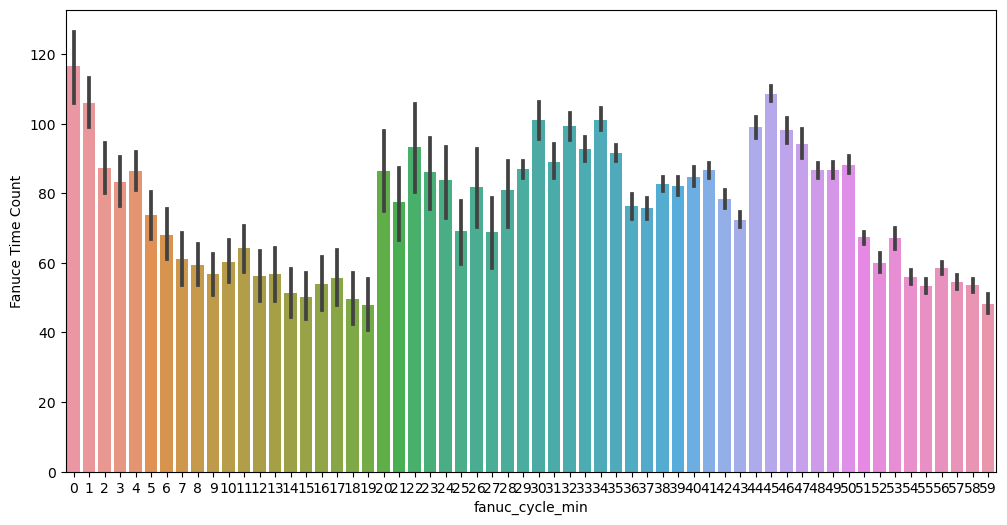

In [103]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x="fanuc_cycle_min",y="Fanuce Time Count",data=fanuc_time)

In [104]:
fanuc_absolute=df.groupby(['fanuc_absoluteX','fanuc_absoluteY','fanuc_absoluteZ']).size().reset_index().rename(columns={0:'Absolute value Count'})
fanuc_absolute

,fanuc_absoluteX,fanuc_absoluteY,fanuc_absoluteZ,Absolute value Count
0,-605.750,361.530,607.10,123
1,-605.358,361.530,607.10,1
2,-603.069,361.530,607.10,1
3,-599.845,361.530,607.10,1
4,-597.196,361.530,607.10,1
...,...,...,...,...
260304,612.373,361.426,606.95,1
260305,612.379,361.430,408.04,1
260306,612.380,361.430,356.20,2
260307,612.380,361.430,391.79,2


<AxesSubplot:xlabel='fanuc_absoluteX', ylabel='Absolute value Count'>

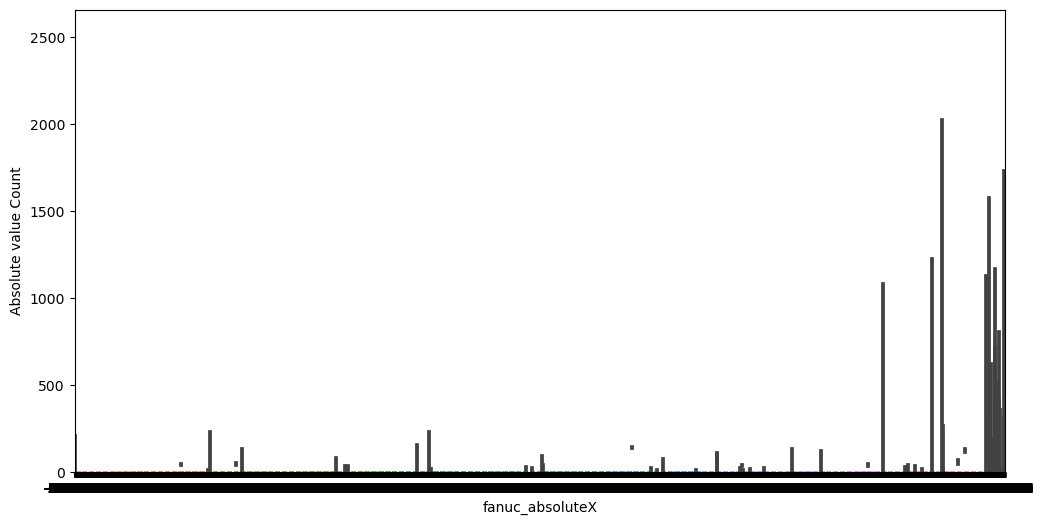

In [105]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x="fanuc_absoluteX",y="Absolute value Count",data=fanuc_absolute) 

In [106]:
df.columns

Index(['insert_datetime', 'fanuc_runState_now', 'fanuc_runState_past',
       'fanuc_cycle_hour', 'fanuc_cycle_min', 'fanuc_cycle_sec', 'fanuc_rpm1',
       'fanuc_rpm1_unit', 'fanuc_troq1', 'fanuc_troq1_unit',
       'fanuc_gearRatio1', 'fanuc_ToolNum', 'fanuc_absoluteX',
       'fanuc_absoluteY', 'fanuc_absoluteZ', 'fanuc_distanceX',
       'fanuc_distanceY', 'fanuc_distanceZ', 'ep1_activeTotal',
       'ep2_activeTotal', 'ep3_activeTotal', 'ep4_activeTotal',
       'ep5_activeTotal'],
      dtype='object')

In [107]:
fanuc_rpm=df.groupby(['fanuc_rpm1','fanuc_rpm1_unit']).size().reset_index().rename(columns={0:'RPM Count'})
fanuc_rpm

,fanuc_rpm1,fanuc_rpm1_unit,RPM Count
0,0,1,46710
1,1,1,1016
2,2,1,511
3,3,1,342
4,4,1,275
...,...,...,...
3376,5754,1,5359
3377,5755,1,1153
3378,5756,1,164
3379,5757,1,39


<AxesSubplot:xlabel='fanuc_rpm1', ylabel='RPM Count'>

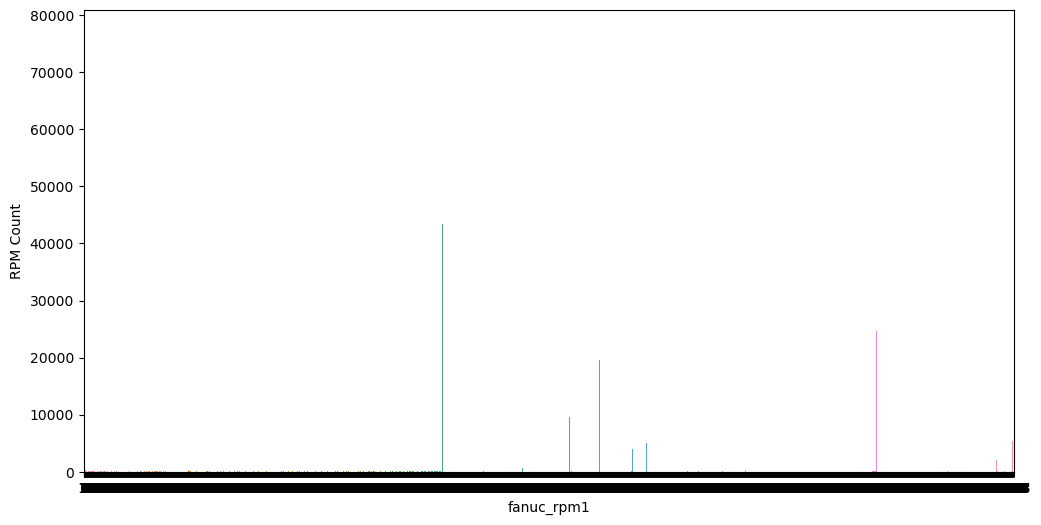

In [108]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x="fanuc_rpm1",y="RPM Count",data=fanuc_rpm) 

In [112]:
df.columns

Index(['insert_datetime', 'fanuc_runState_now', 'fanuc_runState_past',
       'fanuc_cycle_hour', 'fanuc_cycle_min', 'fanuc_cycle_sec', 'fanuc_rpm1',
       'fanuc_rpm1_unit', 'fanuc_troq1', 'fanuc_troq1_unit',
       'fanuc_gearRatio1', 'fanuc_ToolNum', 'fanuc_absoluteX',
       'fanuc_absoluteY', 'fanuc_absoluteZ', 'fanuc_distanceX',
       'fanuc_distanceY', 'fanuc_distanceZ', 'ep1_activeTotal',
       'ep2_activeTotal', 'ep3_activeTotal', 'ep4_activeTotal',
       'ep5_activeTotal'],
      dtype='object')

In [113]:
fanuc_troq=df.groupby(['fanuc_troq1','fanuc_troq1_unit']).size().reset_index().rename(columns={0:'Troq Count'})
fanuc_troq

,fanuc_troq1,fanuc_troq1_unit,Troq Count
0,0,0,102311
1,1,0,51175
2,2,0,30482
3,3,0,26869
4,4,0,27507
...,...,...,...
143,143,0,41
144,144,0,29
145,145,0,47
146,146,0,75


<AxesSubplot:xlabel='fanuc_troq1', ylabel='Troq Count'>

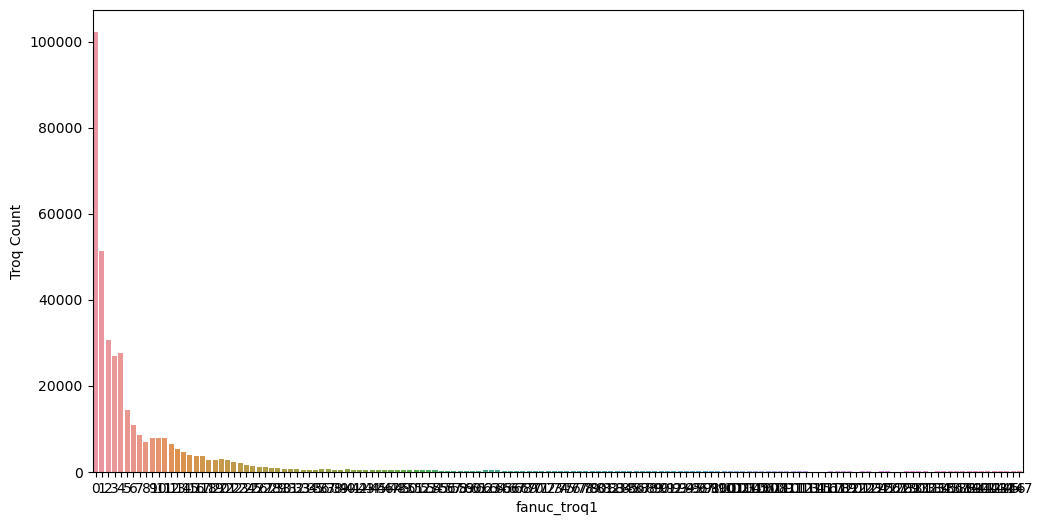

In [111]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x="fanuc_troq1" ,y="Troq Count",data=fanuc_troq) 

In [ ]:
X = df[['fanuc_cycle_hour', 'fanuc_cycle_min']]

In [ ]:
plt.close()
plt.style.use('seaborn')
plt.scatter(X['fanuc_cycle_hour'], X['fanuc_cycle_min'])
plt.xlabel('fanuc_cycle_hour')
plt.ylabel('fanuc_cycle_min')

# Data distribution
* A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables.

In [ ]:
sns.distplot(df['fanuc_cycle_sec'].fillna(100))

In [ ]:
# sns.set(style='dark')
# data = np.random.randn(368615)
# plot = sns.distplot(df,color='purple')

# plt.show()

# Data Cleaning and Data-Preprocessing::
* The dataset contains few missing values which must be cleaned and curated to proceed with our analysis.The following data cleaning steps were performed on the dataset:
 
* Identifying the column containing missing values and Removing the unnecessary column

In [114]:
#df.drop(['mac', 'ip', 'plc_ip', 'glpi_ip', 'insert_datetime', 'fanuc_seriesName', 'fanuc_autoState', 'fanuc_runState_now', 'fanuc_runState_past', 'fanuc_seriesName', 'fanuc_autoState', 'fanuc_runState_now', 'fanuc_runState_past', 'fanuc_alarm_no', 'fanuc_alarm_msg'], axis = 1, inplace = True)
#df.drop(['mac', 'ip', 'plc_ip', 'glpi_ip', 'insert_datetime', 'insert_datetime.1', 'fanuc_seriesName', 'fanuc_autoState', 'fanuc_runState_now', 'fanuc_runState_past', 'fanuc_seriesName', 'fanuc_autoState', 'fanuc_runState_now', 'fanuc_runState_past'], axis = 1, inplace = True) 
df.drop(['insert_datetime'], axis = 1, inplace = True)

In [115]:
cols = list(df)[0:23]  # This convert the column in the form of list.
cols

['fanuc_runState_now',
 'fanuc_runState_past',
 'fanuc_cycle_hour',
 'fanuc_cycle_min',
 'fanuc_cycle_sec',
 'fanuc_rpm1',
 'fanuc_rpm1_unit',
 'fanuc_troq1',
 'fanuc_troq1_unit',
 'fanuc_gearRatio1',
 'fanuc_ToolNum',
 'fanuc_absoluteX',
 'fanuc_absoluteY',
 'fanuc_absoluteZ',
 'fanuc_distanceX',
 'fanuc_distanceY',
 'fanuc_distanceZ',
 'ep1_activeTotal',
 'ep2_activeTotal',
 'ep3_activeTotal',
 'ep4_activeTotal',
 'ep5_activeTotal']

* RPM-> revolutions per minute
* RPM stands for revolutions per minute, and it's used as a measure of how fast any machine is operating at a given time.

* Torque is the measure of the force that can cause an object to rotate about an axis.Hence, torque can be defined as the rotational equivalent of linear force. The straight line about which the object rotates is called the axis of rotation. In physics, torque is simply the tendency of a force to turn.

* 

In [116]:
df.dtypes[0:23] # It checks the data types

fanuc_runState_now      object
fanuc_runState_past     object
fanuc_cycle_hour         int64
fanuc_cycle_min          int64
fanuc_cycle_sec          int64
fanuc_rpm1               int64
fanuc_rpm1_unit          int64
fanuc_troq1              int64
fanuc_troq1_unit         int64
fanuc_gearRatio1         int64
fanuc_ToolNum            int64
fanuc_absoluteX        float64
fanuc_absoluteY        float64
fanuc_absoluteZ        float64
fanuc_distanceX        float64
fanuc_distanceY        float64
fanuc_distanceZ        float64
ep1_activeTotal        float64
ep2_activeTotal        float64
ep3_activeTotal        float64
ep4_activeTotal        float64
ep5_activeTotal        float64
dtype: object

In [117]:
df

,fanuc_runState_now,fanuc_runState_past,fanuc_cycle_hour,fanuc_cycle_min,fanuc_cycle_sec,fanuc_rpm1,fanuc_rpm1_unit,fanuc_troq1,fanuc_troq1_unit,fanuc_gearRatio1,...,fanuc_absoluteY,fanuc_absoluteZ,fanuc_distanceX,fanuc_distanceY,fanuc_distanceZ,ep1_activeTotal,ep2_activeTotal,ep3_activeTotal,ep4_activeTotal,ep5_activeTotal
0,START,START,0,48,31,0,1,0,0,704,...,405.850,606.150,0.000,0.000,0.000,5.354,0.004,0.079,0.007,0.009
1,START,START,0,48,32,0,1,0,0,704,...,405.850,606.150,0.000,0.000,0.000,5.354,0.004,0.079,0.007,0.009
2,START,START,0,48,33,0,1,0,0,704,...,405.850,606.150,0.000,0.000,0.000,5.392,0.004,0.059,0.007,0.009
3,START,START,0,48,34,0,1,0,0,704,...,405.850,606.150,0.000,0.000,0.000,5.392,0.004,0.059,0.007,0.009
4,START,START,0,48,49,3824,1,22,0,672,...,41.000,-18.933,0.000,0.000,-9.067,11.603,0.004,0.349,0.002,0.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368610,START,START,0,14,32,1333,1,1,0,680,...,49.199,0.000,-117.620,-176.699,0.000,5.827,0.001,0.261,0.004,0.206
368611,START,START,0,14,37,1333,1,1,0,680,...,8.636,0.000,-127.202,-136.136,0.000,5.746,0.005,0.205,0.004,0.183
368612,START,START,0,14,38,1333,1,1,0,680,...,0.110,0.000,-127.494,-127.610,0.000,5.778,0.004,0.188,0.004,0.183
368613,START,START,0,14,39,1333,1,1,0,680,...,-8.151,0.000,-127.234,-119.349,0.000,5.778,0.004,0.188,0.004,0.183


In [118]:
null_values = df.isnull().sum() #identifying missing values and  # This function gives the information about Null values against each features
null_values[0:23]

fanuc_runState_now     0
fanuc_runState_past    0
fanuc_cycle_hour       0
fanuc_cycle_min        0
fanuc_cycle_sec        0
fanuc_rpm1             0
fanuc_rpm1_unit        0
fanuc_troq1            0
fanuc_troq1_unit       0
fanuc_gearRatio1       0
fanuc_ToolNum          0
fanuc_absoluteX        0
fanuc_absoluteY        0
fanuc_absoluteZ        0
fanuc_distanceX        0
fanuc_distanceY        0
fanuc_distanceZ        0
ep1_activeTotal        0
ep2_activeTotal        0
ep3_activeTotal        0
ep4_activeTotal        0
ep5_activeTotal        0
dtype: int64

In [119]:
# df = pd.DataFrame(df)
# df.fillna(df.median())

# Convert categorical variable into integers

In [120]:
from sklearn.preprocessing import LabelEncoder

def labelencoder(df):                                     #This function converts the catorigcal and string data into numerical values to 
    for c in df.columns:                                  #interperate easily.
        if df[c].dtype=='object': 
            df[c] = df[c].fillna('N')
            lbl = LabelEncoder()
            lbl.fit(list(df[c].values))
            df[c] = lbl.transform(df[c].values)
    return df

In [121]:
df=labelencoder(df) #Here just calling the function of labelencoder and view data after encoding 
df      

,fanuc_runState_now,fanuc_runState_past,fanuc_cycle_hour,fanuc_cycle_min,fanuc_cycle_sec,fanuc_rpm1,fanuc_rpm1_unit,fanuc_troq1,fanuc_troq1_unit,fanuc_gearRatio1,...,fanuc_absoluteY,fanuc_absoluteZ,fanuc_distanceX,fanuc_distanceY,fanuc_distanceZ,ep1_activeTotal,ep2_activeTotal,ep3_activeTotal,ep4_activeTotal,ep5_activeTotal
0,2,2,0,48,31,0,1,0,0,704,...,405.850,606.150,0.000,0.000,0.000,5.354,0.004,0.079,0.007,0.009
1,2,2,0,48,32,0,1,0,0,704,...,405.850,606.150,0.000,0.000,0.000,5.354,0.004,0.079,0.007,0.009
2,2,2,0,48,33,0,1,0,0,704,...,405.850,606.150,0.000,0.000,0.000,5.392,0.004,0.059,0.007,0.009
3,2,2,0,48,34,0,1,0,0,704,...,405.850,606.150,0.000,0.000,0.000,5.392,0.004,0.059,0.007,0.009
4,2,2,0,48,49,3824,1,22,0,672,...,41.000,-18.933,0.000,0.000,-9.067,11.603,0.004,0.349,0.002,0.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368610,2,2,0,14,32,1333,1,1,0,680,...,49.199,0.000,-117.620,-176.699,0.000,5.827,0.001,0.261,0.004,0.206
368611,2,2,0,14,37,1333,1,1,0,680,...,8.636,0.000,-127.202,-136.136,0.000,5.746,0.005,0.205,0.004,0.183
368612,2,2,0,14,38,1333,1,1,0,680,...,0.110,0.000,-127.494,-127.610,0.000,5.778,0.004,0.188,0.004,0.183
368613,2,2,0,14,39,1333,1,1,0,680,...,-8.151,0.000,-127.234,-119.349,0.000,5.778,0.004,0.188,0.004,0.183


In [125]:
df.info(verbose=True) #Prints information of all columns(If verbose =False -> Prints a summary of columns count and its dtypes but not per column information)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368615 entries, 0 to 368614
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fanuc_runState_now   368615 non-null  int32  
 1   fanuc_runState_past  368615 non-null  int32  
 2   fanuc_cycle_hour     368615 non-null  int64  
 3   fanuc_cycle_min      368615 non-null  int64  
 4   fanuc_cycle_sec      368615 non-null  int64  
 5   fanuc_rpm1           368615 non-null  int64  
 6   fanuc_rpm1_unit      368615 non-null  int64  
 7   fanuc_troq1          368615 non-null  int64  
 8   fanuc_troq1_unit     368615 non-null  int64  
 9   fanuc_gearRatio1     368615 non-null  int64  
 10  fanuc_ToolNum        368615 non-null  int64  
 11  fanuc_absoluteX      368615 non-null  float64
 12  fanuc_absoluteY      368615 non-null  float64
 13  fanuc_absoluteZ      368615 non-null  float64
 14  fanuc_distanceX      368615 non-null  float64
 15  fanuc_distanceY  

In [126]:
df.head()

,fanuc_runState_now,fanuc_runState_past,fanuc_cycle_hour,fanuc_cycle_min,fanuc_cycle_sec,fanuc_rpm1,fanuc_rpm1_unit,fanuc_troq1,fanuc_troq1_unit,fanuc_gearRatio1,...,fanuc_absoluteY,fanuc_absoluteZ,fanuc_distanceX,fanuc_distanceY,fanuc_distanceZ,ep1_activeTotal,ep2_activeTotal,ep3_activeTotal,ep4_activeTotal,ep5_activeTotal
0,2,2,0,48,31,0,1,0,0,704,...,405.85,606.150,0.0,0.0,0.000,5.354,0.004,0.079,0.007,0.009
1,2,2,0,48,32,0,1,0,0,704,...,405.85,606.150,0.0,0.0,0.000,5.354,0.004,0.079,0.007,0.009
2,2,2,0,48,33,0,1,0,0,704,...,405.85,606.150,0.0,0.0,0.000,5.392,0.004,0.059,0.007,0.009
3,2,2,0,48,34,0,1,0,0,704,...,405.85,606.150,0.0,0.0,0.000,5.392,0.004,0.059,0.007,0.009
4,2,2,0,48,49,3824,1,22,0,672,...,41.00,-18.933,0.0,0.0,-9.067,11.603,0.004,0.349,0.002,0.084


# The describe() method returns description of the data in the DataFrame.

* If the DataFrame contains numerical data, the description contains these information for each column:

* count - The number of not-empty values.
* mean - The average (mean) value.
* std - The standard deviation.
* min - the minimum value.
* 25% - The 25% percentile*.
* 50% - The 50% percentile*.
* 75% - The 75% percentile*.
* max - the maximum value.

* Percentile meaning: how many of the values are less than the given percentile

In [127]:
df.describe()

,fanuc_runState_now,fanuc_runState_past,fanuc_cycle_hour,fanuc_cycle_min,fanuc_cycle_sec,fanuc_rpm1,fanuc_rpm1_unit,fanuc_troq1,fanuc_troq1_unit,fanuc_gearRatio1,...,fanuc_absoluteY,fanuc_absoluteZ,fanuc_distanceX,fanuc_distanceY,fanuc_distanceZ,ep1_activeTotal,ep2_activeTotal,ep3_activeTotal,ep4_activeTotal,ep5_activeTotal
count,368615.000000,368615.000000,368615.000000,368615.000000,368615.000000,368615.000000,368615.0,368615.000000,368615.0,368615.000000,...,368615.000000,368615.000000,368615.000000,368615.000000,368615.000000,368615.000000,368615.000000,368615.000000,368615.000000,368615.000000
mean,1.998863,1.998956,0.096873,24.547886,29.310766,2488.906005,1.0,7.226491,0.0,678.178132,...,61.960245,78.893050,1.833317,-5.197008,-3.353361,7.393980,0.046069,0.351589,0.071890,0.413346
std,0.051681,0.049593,0.295786,17.227489,17.292312,1796.717860,0.0,14.249685,0.0,13.200678,...,139.396541,226.866618,76.628250,56.406688,33.130409,2.526778,0.176557,0.727148,0.273801,1.196007
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.0,640.000000,...,-196.000000,-235.500000,-709.248000,-535.340000,-410.410000,0.001000,0.001000,0.001000,0.001000,0.001000
25%,2.000000,2.000000,0.000000,9.000000,14.000000,1329.000000,1.0,0.000000,0.0,672.000000,...,-10.005000,-20.888500,0.000000,0.000000,-3.085000,5.802000,0.004000,0.073000,0.003000,0.033000
50%,2.000000,2.000000,0.000000,23.000000,29.000000,2133.000000,1.0,3.000000,0.0,672.000000,...,19.557000,0.000000,0.000000,0.000000,0.000000,6.714000,0.004000,0.126000,0.004000,0.099000
75%,2.000000,2.000000,0.000000,39.000000,44.000000,4603.000000,1.0,8.000000,0.0,680.000000,...,102.000000,3.000000,0.000000,0.000000,0.000000,8.421000,0.012000,0.329000,0.006000,0.339000
max,3.000000,3.000000,1.000000,59.000000,59.000000,5758.000000,1.0,147.000000,0.0,744.000000,...,535.340000,683.890000,709.300000,534.005000,480.193000,32.209000,3.919000,23.836000,4.542000,24.879000


# Feature Scaling

In [128]:
X=df

In [129]:
cols = X.columns

In [130]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [131]:
X = pd.DataFrame(X, columns=[cols])

In [132]:
X.head()

,fanuc_runState_now,fanuc_runState_past,fanuc_cycle_hour,fanuc_cycle_min,fanuc_cycle_sec,fanuc_rpm1,fanuc_rpm1_unit,fanuc_troq1,fanuc_troq1_unit,fanuc_gearRatio1,...,fanuc_absoluteY,fanuc_absoluteZ,fanuc_distanceX,fanuc_distanceY,fanuc_distanceZ,ep1_activeTotal,ep2_activeTotal,ep3_activeTotal,ep4_activeTotal,ep5_activeTotal
0,0.666667,0.666667,0.0,0.813559,0.525424,0.000000,0.0,0.00000,0.0,0.615385,...,0.822941,0.915444,0.499982,0.500624,0.460823,0.166201,0.000766,0.003272,0.001321,0.000322
1,0.666667,0.666667,0.0,0.813559,0.542373,0.000000,0.0,0.00000,0.0,0.615385,...,0.822941,0.915444,0.499982,0.500624,0.460823,0.166201,0.000766,0.003272,0.001321,0.000322
2,0.666667,0.666667,0.0,0.813559,0.559322,0.000000,0.0,0.00000,0.0,0.615385,...,0.822941,0.915444,0.499982,0.500624,0.460823,0.167381,0.000766,0.002433,0.001321,0.000322
3,0.666667,0.666667,0.0,0.813559,0.576271,0.000000,0.0,0.00000,0.0,0.615385,...,0.822941,0.915444,0.499982,0.500624,0.460823,0.167381,0.000766,0.002433,0.001321,0.000322
4,0.666667,0.666667,0.0,0.813559,0.830508,0.664119,0.0,0.14966,0.0,0.307692,...,0.324063,0.235555,0.499982,0.500624,0.450642,0.360221,0.000766,0.014600,0.000220,0.003336


In [133]:
X.isnull().sum()

fanuc_runState_now     0
fanuc_runState_past    0
fanuc_cycle_hour       0
fanuc_cycle_min        0
fanuc_cycle_sec        0
fanuc_rpm1             0
fanuc_rpm1_unit        0
fanuc_troq1            0
fanuc_troq1_unit       0
fanuc_gearRatio1       0
fanuc_ToolNum          0
fanuc_absoluteX        0
fanuc_absoluteY        0
fanuc_absoluteZ        0
fanuc_distanceX        0
fanuc_distanceY        0
fanuc_distanceZ        0
ep1_activeTotal        0
ep2_activeTotal        0
ep3_activeTotal        0
ep4_activeTotal        0
ep5_activeTotal        0
dtype: int64

In [134]:
X[X==np.inf]=np.nan
X.fillna(X.mean(), inplace=True)

# Finding the Optimal Number of Clusters with the Elbow Method

In [135]:
from sklearn.cluster import KMeans

sum_of_sqr_dist = {}

for k in range(1, 10):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km = km.fit(X)
    sum_of_sqr_dist[k] = km.inertia_

C:\Users\Imtiyaj\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Imtiyaj\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Imtiyaj\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Imtiyaj\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Imtiyaj\anaconda3\lib\site-pack

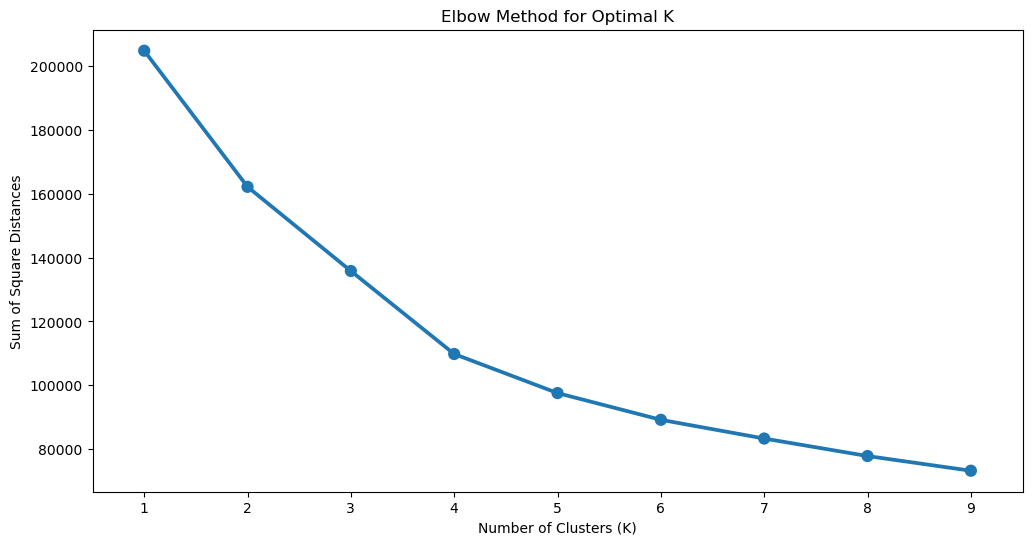

In [137]:
sns.pointplot(x=list(sum_of_sqr_dist.keys()), y=list(sum_of_sqr_dist.values()))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Square Distances")
plt.title("Elbow Method for Optimal K")
plt.show()

# K-Means model with two clusters

In [159]:
Model = KMeans(n_clusters=2,
             init='k-means++',
             max_iter=1000)
Model.fit(X)

C:\Users\Imtiyaj\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


KMeans(max_iter=1000, n_clusters=2)

In [160]:
print("Labels", Model.labels_)

Labels [0 0 0 ... 0 0 0]


In [161]:
print("Centroids", Model.cluster_centers_)

Centroids [[-6.94583280e-14  4.49391476e-01 -6.94583280e-14]
 [ 1.00000000e+00  1.05379596e-01  1.00000000e+00]]


In [162]:
centroids = Model.cluster_centers_

In [163]:
X = X.copy()
X["Cluster"] = Model.fit_predict(X)

C:\Users\Imtiyaj\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [164]:
X.head()


,fanuc_cycle_hour,fanuc_cycle_min,Cluster
0,0.0,0.813559,0
1,0.0,0.813559,0
2,0.0,0.813559,0
3,0.0,0.813559,0
4,0.0,0.813559,0


# Visualizing Clusters

In [165]:
from sklearn.cluster import KMeans
 
kmeans = KMeans(n_clusters=2,
             init='k-means++',
             max_iter=1000)
 
label = kmeans.fit_predict(X)
X["cluster"]=label

C:\Users\Imtiyaj\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


# K-Means model parameters details

* The KMeans algorithm clusters data by trying to separate samples in n groups of equal variances, minimizing a criterion known as inertia, or within-cluster sum-of-squares Inertia, or the within-cluster sum of squares criterion, can be recognized as a measure of how internally coherent clusters are.

* The k-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean j of the samples in the cluster. The means are commonly called the cluster centroids.

* The K-means algorithm aims to choose centroids that minimize the inertia, or within-cluster sum of squared criterion.

In [166]:
kmeans.cluster_centers_

array([[ 1.00000000e+00,  1.05379596e-01,  1.00000000e+00],
       [-6.94583280e-14,  4.49391476e-01, -6.94583280e-14]])

# Inertia
* Inertia is not a normalized metric.

* The lower values of inertia are better and zero is optimal.

* But in very high-dimensional spaces, euclidean distances tend to become inflated (this is an instance of curse of dimensionality).

* Running a dimensionality reduction algorithm such as PCA prior to k-means clustering can alleviate this problem and speed up the computations.

* We can calculate model inertia as follows:-

In [167]:
kmeans.inertia_  # The lesser the model inertia, the better the model fit. 
                 # We can see that the model has very high inertia. So, this is not a good model fit to the data.

27611.069720178217

In [168]:
print("Labels", kmeans.labels_)

Labels [1 1 1 ... 1 1 1]


In [169]:
dataFrame=X
dataFrame

,fanuc_cycle_hour,fanuc_cycle_min,Cluster,cluster
0,0.0,0.813559,0,1
1,0.0,0.813559,0,1
2,0.0,0.813559,0,1
3,0.0,0.813559,0,1
4,0.0,0.813559,0,1
...,...,...,...,...
368610,0.0,0.237288,0,1
368611,0.0,0.237288,0,1
368612,0.0,0.237288,0,1
368613,0.0,0.237288,0,1


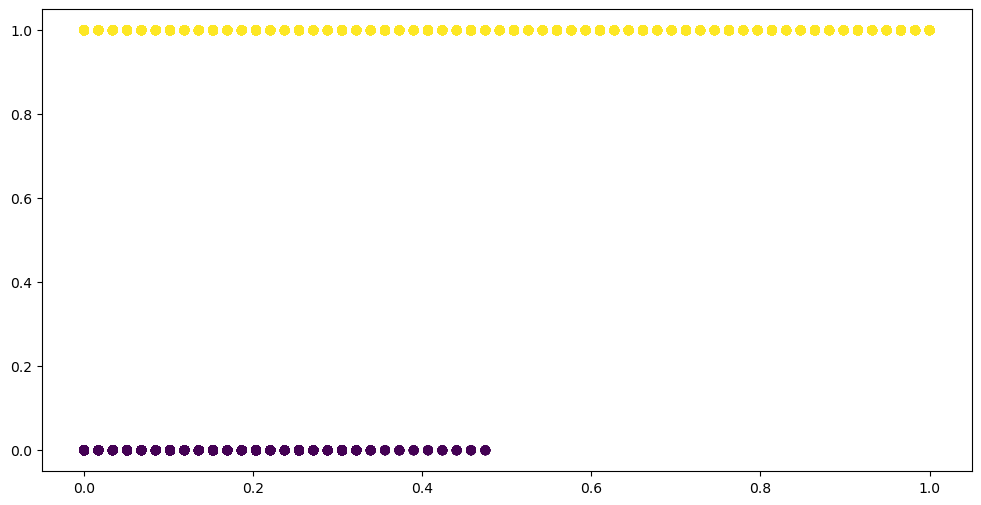

In [170]:
x=dataFrame["fanuc_cycle_min"]
y=dataFrame['cluster']
plt.scatter(x, y, c=kmeans.labels_)
plt.show()

In [171]:
Labels=dataFrame['cluster']                        # It take cluster column as a targeted label.
dataX=dataFrame.drop('cluster',axis=1)             #It drop the cluster column and consider all other values .

# Handle Missing Values or NAN values

In [172]:
from sklearn.impute import SimpleImputer                                         #SimpleImputer  help to filed the missing 
                                                                                   # or non-values  using means or median.
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(dataX)
X = imputer.transform(dataX)

C:\Users\Imtiyaj\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Imtiyaj\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


# Feature Selection
* Bruta or RFE are used as a feature selection method, It select useful features and drop less useful features.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier(max_depth=1) #For Boruta
from boruta import BorutaPy
feat_selector = BorutaPy(model, n_estimators='auto', verbose=1, random_state=101)
feat_selector.fit(X,Labels)
print(feat_selector.support_)  #Should we accept the featur
print(feat_selector.ranking_) #Rank 1 is the best
X_filtered1 = feat_selector.transform(X)  #Apply feature selection and return transformed data

C:\Users\Imtiyaj\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 1 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 2 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 3 / 100


C:\Users\Imtiyaj\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


In [ ]:
Final_selected=X_filtered1

In [ ]:
from sklearn.preprocessing import MinMaxScaler

Final_selected =  (Final_selected - Final_selected.mean()) / Final_selected.std()
scaler = MinMaxScaler(feature_range=(0, 1))                        #Again, It normalized the whole dataset between 0 and 1.
Final_selected = scaler.fit_transform(Final_selected)

In [ ]:
#This step divided the whole dataset into training and testing by keeping test size 20%
X_train, X_test,y_train, y_test = train_test_split(Final_selected,Labels, test_size=0.20,random_state=9)

In [ ]:
print('training features =',X_train.shape)
print('testing features   =',y_train.shape)
print('training labels=',X_test.shape)
print('testing labels =',y_test.shape)

# RandomForest (RF)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

modelRF = RandomForestClassifier(n_estimators=100)       
modelRF.fit(X_train, y_train)
prediction = modelRF.predict(X_test)
s7=accuracy_score(y_test,prediction)
print(classification_report(y_test, prediction))
print("RF Accuracy :", "{:.2f}%".format(100*s7))
print(confusion_matrix(y_test, prediction))

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(modelRF, X_test, y_test, cmap = 'Blues')
plt.grid(False)

In [ ]:
from sklearn.metrics import roc_curve

#Predicting proba
y_pred_prob = modelRF.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# SVM

In [ ]:
from sklearn.svm import SVC
from sklearn import svm
#model = svm.LinearSVC(multi_class="ovr")
modelSVM = svm.SVC(kernel='rbf', gamma=7.9, C=20, decision_function_shape='ovo', probability=True)
modelSVM.fit(X_train, y_train)
prediction = modelSVM.predict(X_test)
s7=accuracy_score(y_test,prediction)
print(classification_report(y_test, prediction))
print("SVM Accuracy :", "{:.2f}%".format(100*s7))
print(confusion_matrix(y_test, prediction))

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(modelSVM, X_test, y_test, cmap = 'Blues')
plt.grid(False)

In [ ]:
from sklearn.metrics import roc_curve

#Predicting proba
y_pred_prob = modelSVM.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()